In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xmitgcm as xm
%matplotlib widget

## Use `xmitgcm` to read the data that was created:

In [ ]:
with xm.open_mdsdataset('../runs/RunFr1300/input/', endian='<') as ds:
    TRef=ds.THETA[0,:,0,0]
    display(ds)
    ds['XG'] = (ds['XG'] - ds.XC.mean()) / 1000
    ds['XC'] = (ds['XC'] - ds.XC.mean()) / 1000

/Users/jklymak/Dropbox/MITgcmExampleSteadyGauss/.pixi/envs/default/lib/python3.12/site-packages/xmitgcm/mds_store.py:289: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds['time'] = xr.decode_cf(ds[['time']])['time']
/Users/jklymak/Dropbox/MITgcmExampleSteadyGauss/.pixi/envs/default/lib/python3.12/site-packages/xmitgcm/mds_store.py:289: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds['time'] = xr.decode_cf(ds[['time']])['time']
/Users/jklymak/Dropbox/MITgcmExampleSteadyGauss/.pixi/envs/default/lib/python3.12/site-packages/xmitgcm/mds_store.py:289: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_

<xarray.Dataset> Size: 5MB
Dimensions:  (XC: 80, YC: 1, XG: 80, YG: 1, Z: 25, Zp1: 26, Zu: 25, Zl: 25,
              time: 53)
Coordinates: (12/37)
  * XC       (XC) float64 640B 1.237e+04 3.629e+04 ... 3.787e+05 4.026e+05
  * YC       (YC) float64 8B 2.5e+03
  * XG       (XG) float64 640B 7.276e-12 2.474e+04 ... 3.672e+05 3.903e+05
  * YG       (YG) float64 8B 0.0
  * Z        (Z) float64 200B -40.0 -120.0 -200.0 ... -1.88e+03 -1.96e+03
  * Zp1      (Zp1) float64 208B 0.0 -80.0 -160.0 ... -1.84e+03 -1.92e+03 -2e+03
    ...       ...
    dxF      (YC, XC) float64 640B dask.array<chunksize=(1, 80), meta=np.ndarray>
    dyU      (YG, XG) float64 640B dask.array<chunksize=(1, 80), meta=np.ndarray>
    maskInS  (YG, XC) bool 80B dask.array<chunksize=(1, 80), meta=np.ndarray>
    dyF      (YC, XC) float64 640B dask.array<chunksize=(1, 80), meta=np.ndarray>
    iter     (time) int64 424B dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 424B 0 days 00:00:00 ... 111 days 22:40:00
Data variables:
    UVEL     (time, Z, YC, XG) float64 848kB dask.array<chunksize=(1, 25, 1, 80), meta=np.ndarray>
    VVEL     (time, Z, YG, XC) float64 848kB dask.array<chunksize=(1, 25, 1, 80), meta=np.ndarray>
    WVEL     (time, Zl, YC, XC) float64 848kB dask.array<chunksize=(1, 25, 1, 80), meta=np.ndarray>
    THETA    (time, Z, YC, XC) float64 848kB dask.array<chunksize=(1, 25, 1, 80), meta=np.ndarray>
    SALT     (time, Z, YC, XC) float64 848kB dask.array<chunksize=(1, 25, 1, 80), meta=np.ndarray>
    PHIHYD   (time, Z, YC, XC) float64 848kB dask.array<chunksize=(1, 25, 1, 80), meta=np.ndarray>
    ETAN     (time, YC, XC) float64 34kB dask.array<chunksize=(1, 1, 80), meta=np.ndarray>
    PHIBOT   (time, YC, XC) float64 34kB dask.array<chunksize=(1, 1, 80), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(data_dir='../runs/RunFr...

## Plot the data

9672000000000000 nanoseconds


<>:15: SyntaxWarning: invalid escape sequence '\ '
<>:15: SyntaxWarning: invalid escape sequence '\ '
/var/folders/kx/4c3bx_w92t31pqyvg6ws03200000gn/T/ipykernel_26888/1063056152.py:15: SyntaxWarning: invalid escape sequence '\ '
  fig.colorbar(pcm, ax=ax, shrink=0.5, extend='both', label='$U - U_0\ \mathrm{[m\,s^{-1}]}$')


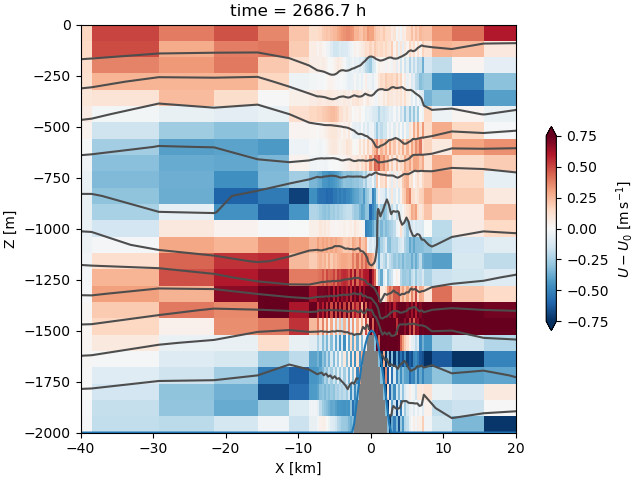

In [32]:
fig, ax = plt.subplots(layout='constrained')
T0 = ds.THETA.isel(time=0, YC=0)
U= ds.UVEL.isel(time=-1, YC=0)
U = np.ma.masked_where(T0==0, U)
pcm=ax.pcolormesh(ds['XG'], ds['Z'], U-0.32, vmin=-0.75, vmax=0.75, cmap='RdBu_r', rasterized=True, shading=
'nearest')

T= ds.THETA.isel(time=-1, YC=0)
T = np.ma.masked_where(T0==0, T)
ax.contour(ds['XC'], ds['Z'], T, levels = np.sort(TRef[::2]), colors='0.3',)

ax.plot(ds['XC'],-ds['Depth'][0,:])

ax.set_xlim([-40, 20])
fig.colorbar(pcm, ax=ax, shrink=0.5, extend='both', label='$U - U_0\ \mathrm{[m\,s^{-1}]}$')
ax.set_xlabel('X [km]')
ax.set_ylabel('Z [m]')
ax.set_facecolor('0.5')
print(ds.isel(time=-1).time.values)
time = float(ds.isel(time=-1).time.values) / 1e9 / 3600
ax.set_title(f'time = {time:.1f} h')
#ax.set_title('U [m/s] %1.2f h'%(ds.timestart[-1]/3600.) ,loc='left')
if True:
    fig.savefig('../docs/images/Snapshot.png')